#Data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# %matplotlib inline   : 그래프를 주피터 노트북 화면상에 바로 띄울 수 있게하는 코드.
import seaborn as sns   # 쉽고 직관적인 방법으로 그래프를 띄울 수 있는 패키지

import warnings
warnings.filterwarnings('ignore')

In [ ]:
path = '/content/drive/MyDrive/22_titanic/'
train = pd.read_csv(path+'train.csv')

#Exploratory Data Analysis (EDA)

In [ ]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S




*   PassengerID : 탑승객의 고유 아이디
*   Survived : 생존여부 (1:생존, 0:사망)
*   Pclass : 등실의 등급 (1:1등급 ...)
*   Sibsp : 함께 탑승한 형제자매, 아내 or 남편의 수
*   Parch : 함께 탑승한 부모, 자식의 수
*   Ticket : 티겟번호
*   Fare : 티겟 요금
*   Cabin : 객실번호
*   Embarked : 배에 탑승한 위치 (C = Cherbourg, Q = Queenstown, S = Southampton)
    *   이 배는 프랑스의 셰르부르(Cherbourg)와 아일랜드의 퀸즈 타운에 기항한 다음, 미국의 뉴욕으로 향했다.




In [ ]:
print(f"------train 데이터셋 확인-----")
print(f"       {train.shape}")

------train 데이터셋 확인-----
       (891, 12)


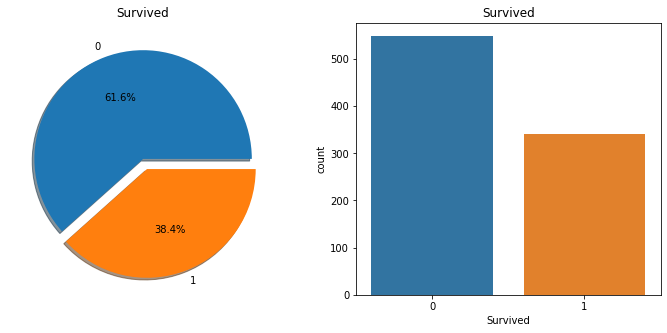

In [ ]:
# 생존율 살피기
f,ax = plt.subplots(1,2,figsize=(12,5))
train['Survived'].value_counts().plot.pie(explode=[0,0.1], autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('Survived')
ax[0].set_ylabel('')

sns.countplot('Survived',data=train,ax=ax[1])
ax[1].set_title('Survived')
plt.show()

## 통계량

In [ ]:
print(f"---------------------train 데이터셋 info---------------------")
print(f"       {train.info()}")
print(f"-------train셋 결측치 확인: {train.isna().sum()}")

---------------------train 데이터셋 info---------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
       None
-------train셋 결측치 확인: PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0


In [ ]:
train=train.drop(columns='Cabin')

In [ ]:
#기술통계량 describe
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
# Pandas 데이터프레임 상관계수 함수 : corr()
train.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


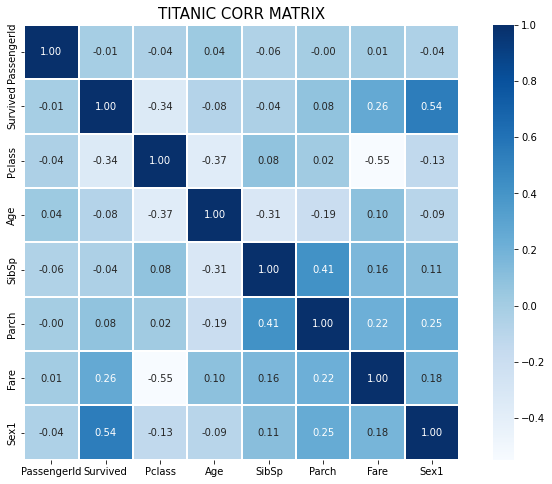

In [ ]:
# 성별도 같이 상관계수 파악하기 위해 int화
train['Sex1'] = pd.factorize(train.Sex)[0]

plt.figure(figsize=(12, 8))
plt.title("TITANIC CORR MATRIX", size = 15)
sns.heatmap(train.corr(),
            square=True,
            annot=True,
            fmt='.2f',
            linewidth = 1,
            cmap="Blues")
plt.show()

Survived 변수와 높은 상관계수(선형성)를 가지는 변수

Sex 0.54 Pclass -0.34 Fare 0.26 Age, Parch -0.08 0.08 SibSp, PassengerId -0.04 -0.01

## Sex

In [ ]:
train['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

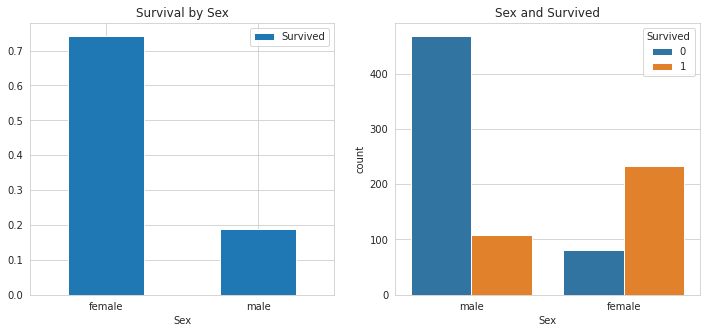

In [ ]:
f,ax = plt.subplots(1,2,figsize=(12,5))
train[['Sex','Survived']].groupby(['Sex']).mean().plot.bar(rot=0,ax=ax[0])
ax[0].set_title('Survival by Sex')

sns.countplot(data=train, x='Sex', hue='Survived',ax = ax[1])
ax[1].set_title('Sex and Survived')
plt.show()
# 남자는 사망자 수가, 여자는 생존자 수가 더 많음. 여자의 생존률이 확연하게 더 높음.

## Pclass 객실등급

In [ ]:
train['Pclass'].unique()

array([3, 1, 2])

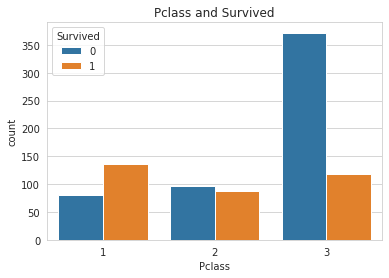

In [ ]:
sns.countplot(data=train, x='Pclass', hue='Survived')
plt.title('Pclass and Survived')
plt.show()
# 등급이 낮을수록 생존자보다 사망자 비율이 더욱 높아짐. 특히, 3등급 : 사람수도 많고 사망자도 많음.

In [ ]:
# 범주형 변수로 되어있는 factor별로 교차분석(cross tabulations)
pd.crosstab(train.Pclass,train.Survived, margins=True).style.background_gradient(cmap='YlOrRd')

# margins : 행과 열의 합을 나타낼 것인지의 여부 파라미터
# .style.background_gradient(cmap='summer_r') : 배경에 색을 입혀주는 파라미터

Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


In [ ]:
# 등급으로 평균 지어 보면 다음과 같음.
train.groupby('Pclass').mean()

,PassengerId,Survived,Age,SibSp,Parch,Fare,Sex1
Pclass,,,,,,,
1,461.597222,0.629630,38.233441,0.416667,0.356481,84.154687,0.435185
2,445.956522,0.472826,29.877630,0.402174,0.380435,20.662183,0.413043
3,439.154786,0.242363,25.140620,0.615071,0.393075,13.675550,0.293279


등급이 낮을수록 **생존율 떨어짐**, **나이 어려짐**, **Fare 적어짐**.

3등급에는 **여자보다 남자가 훨씬 많음**, **SibSip 수가 유독 높음**.

In [ ]:
# Sex와 Pclass 와 Survived
pd.crosstab([train.Sex, train.Survived], train.Pclass, margins=True).style.background_gradient(cmap='YlOrRd')

# Fare

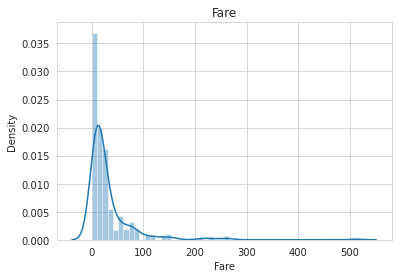

In [ ]:
sns.distplot(train['Fare'])
plt.title('Fare')
plt.show()

In [ ]:
# Fare 변수 범주화
bin_names = ['0','1','2','3']
train['FareBand'] = pd.qcut(train['Fare'],4,labels=bin_names)
train[['FareBand', 'Survived']].groupby(['FareBand']).mean()

,Survived
FareBand,
0,0.197309
1,0.303571
2,0.454955
3,0.581081


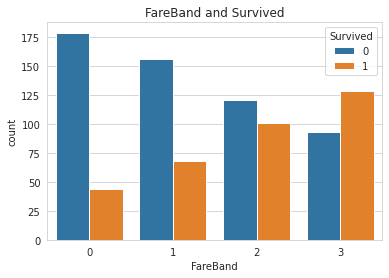

In [ ]:
sns.countplot(data=train, x='FareBand', hue='Survived')
plt.title('FareBand and Survived')
plt.show()

탑승할 때 냈던 Fare의 값이 높을수록 생존율 높아짐.

## Age

In [ ]:
print(f"Age 변수 최고값 : {train['Age'].max()}")
print(f"Age 변수 최저값 : {train['Age'].min()}")

Age 변수 최고값 : 80.0
Age 변수 최저값 : 0.42


In [ ]:
# AgeBand 변수 만들기
train['AgeBand'] = pd.cut(train.Age, bins=5, labels=['Child1','Child-Young','Young','Young-Old','Old'])
train[['AgeBand', 'Survived']].groupby(['AgeBand'], as_index=False).mean().sort_values(by='AgeBand', ascending=True)

,AgeBand,Survived
0,Child1,0.550000
1,Child-Young,0.369942
2,Young,0.404255
3,Young-Old,0.434783
4,Old,0.090909


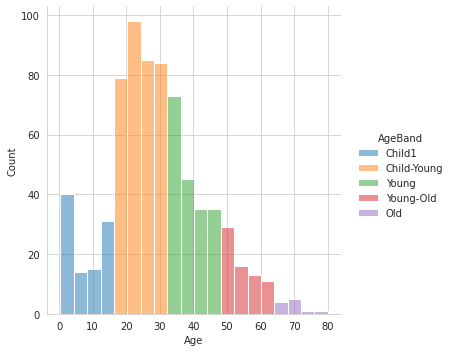

In [ ]:
sns.displot(train, x='Age', hue='AgeBand', element='bars')
plt.show()

In [ ]:
# 구간확인
def Band(x):
    result ={
        'min' : x.min(),
        'max' : x.max()
    }
    return result

train.groupby('AgeBand')['Age'].apply(Band).unstack() # apply는 해당 열 또는 데이터프레임에 내가 작성한 함수를 일괄적으로 적용할때.

,min,max
AgeBand,,
Child1,0.42,16.0
Child-Young,17.00,32.0
Young,32.50,48.0
Young-Old,49.00,64.0
Old,65.00,80.0


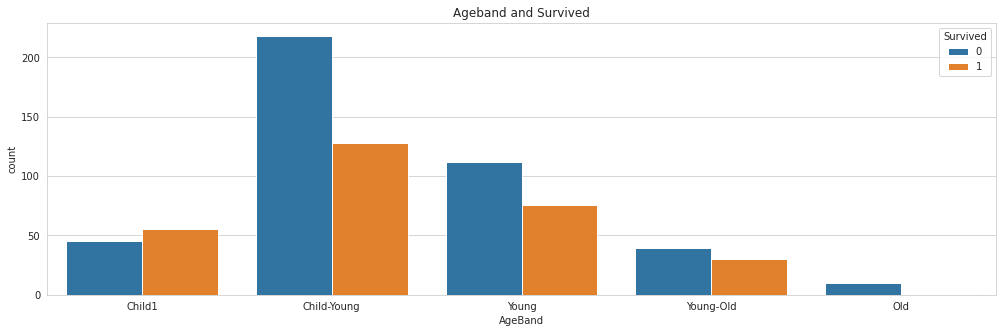

In [ ]:
plt.figure(figsize=(17,5))
sns.countplot(data = train, x = 'AgeBand', hue = 'Survived')
plt.title('Ageband and Survived')
plt.show()

In [ ]:
# 나이와 다른 변수들 및 종속변수와 상관성 살펴보기
def my_summary(x):
    result = {
        'sum':x.sum(),
        'count':x.count(),
        'mean':x.mean(),
        'median':x.median(),
        'variance':x.var()
    }
    return result

train.groupby('AgeBand')['Pclass'].apply(my_summary).unstack()  

,sum,count,mean,median,variance
AgeBand,,,,,
Child1,261.0,100.0,2.610000,3.0,0.422121
Child-Young,836.0,346.0,2.416185,3.0,0.585708
Young,377.0,188.0,2.005319,2.0,0.743287
Young-Old,104.0,69.0,1.507246,1.0,0.518329
Old,19.0,11.0,1.727273,1.0,0.818182


In [ ]:
train.groupby('AgeBand')[['SibSp','Parch']].mean()

,SibSp,Parch
AgeBand,,
Child1,1.570000,1.140000
Child-Young,0.335260,0.242775
Young,0.367021,0.468085
Young-Old,0.333333,0.289855
Old,0.090909,0.181818


나이가 어릴 수록 가족 수가 많음. 특히, 형제자매 수가 많음.

또한 나이 3~50대에 지불하는 요금이 높음. 하지만 30대에는 3등급이 

많으며, 4~60대에 1등급이 많은 것을 볼 수 있음.



---


F층을 보니, 등급이 높은 사람이 많음에도 불구하고 생존율은 매우 낮음. 
노약자는 등급보다도 나이에 영향을 더 받아서 사망 비율이 높음.

A층은 등급이 낮은데도 불구하고 어린이를 우선하여 구출했는지 생존율이 높음.
즉, 어린이는 등급보다 나이에 영향을 더 받아서 생존 비율이 높음.



---


따라서 나이는, 유의미한 변수임을 확인할 수 있음.

## Embarked

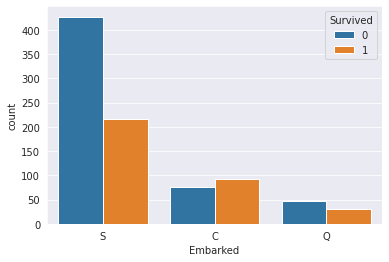

In [ ]:
sns.countplot(data = train, x = 'Embarked', hue = 'Survived')
plt.show()

C 선착장에서 탑승한 사람들은 생존율이 높은 것을 볼 수 있다.

또한 S에서의 생존율에 차이가 꽤 나기 때문에

이 변수는 꽤 유의미한 변수라고도 볼 수 있다.

##Name

In [ ]:
train['Name'].head(10).to_frame()

,Name
0,"Braund, Mr. Owen Harris"
1,"Cumings, Mrs. John Bradley (Florence Briggs Th..."
2,"Heikkinen, Miss. Laina"
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)"
4,"Allen, Mr. William Henry"
5,"Moran, Mr. James"
6,"McCarthy, Mr. Timothy J"
7,"Palsson, Master. Gosta Leonard"
8,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)"
9,"Nasser, Mrs. Nicholas (Adele Achem)"


In [ ]:
# 정규표현식 이용
train['Identity'] = train['Name'].str.extract(' ([A-Za-z]+)\.', expand=False).str.strip()

정규표현식이란

특정한 조건의 문자를 '검색'하거나 '치환'하는 과정을 매우 간편하게 처리하기 위한 수단


```
train['Identity'] = train['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)
```


여기서 사용한 방법은 re 라이브러리없이 Pandas에서 정규표현식을 이용해 특정한 조건을 만족하는 값을 추출한것.

'Identity'라는 새로운 열을 만들고, train에서 Name열의 str(문자열)중에서 (' ([A-Za-z]+)\.', expand=False)를 extract(추출)하여 넣겠다.

' ([A-Za-z]+)\.' : 대문자로 시작하여 이후에는 소문자가 나열되며 .을 만나면 탐색을 멈춘다.

expand 의 default는 True. True인 경우 출력을 하나의 column단위로 나타내고, False인 경우 label단위로 출력

```
strip()
```

strip([chars])은 인자로 전달된 문자를 String의 왼쪽과 오른쪽에서 제거하겠다. default = ' ':공백


https://whatisthenext.tistory.com/116

https://wikidocs.net/4308

In [ ]:
train['Identity'].value_counts()

Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Mlle          2
Major         2
Col           2
Countess      1
Capt          1
Ms            1
Sir           1
Lady          1
Mme           1
Don           1
Jonkheer      1
Name: Identity, dtype: int64

*   Mr. : 성인 남성
*   Mrs. : 결혼을 한 여성
*   Ms. : 결혼 여부를 밝히고 싶지 않을 때 사용하는 여성 호칭
*   Miss : 결혼을 하지 않은 여성
*   Master (Mstr.) : 결혼을 하지 않은 남성. 주로 청소년 이하
*   Dr : 의사

In [ ]:
# Master까지만 유지하고 이외는 하나로 통일
train['Identity'] = np.where(train['Identity'].isin(['Mr','Miss','Mrs','Master']), train['Identity'], 'Others')
train['Identity'].value_counts()

# np.where(조건, 조건만족할때 연산, 조건불만족할때 연산)

Mr        517
Miss      182
Mrs       125
Master     40
Others     27
Name: Identity, dtype: int64

In [ ]:
train.groupby(['Identity'])['Survived'].mean()

Identity
Master    0.575000
Miss      0.697802
Mr        0.156673
Mrs       0.792000
Others    0.444444
Name: Survived, dtype: float64

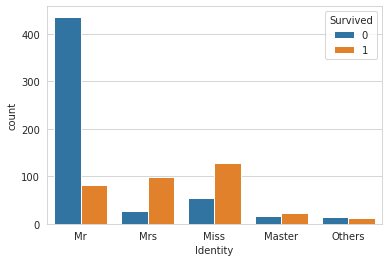

In [ ]:
sns.countplot(data = train, x = 'Identity', hue = 'Survived')
plt.show()